<a href="https://colab.research.google.com/github/N1ckg4m3s/sistema_recomendacao_por_similaridade/blob/main/Sistema_de_recomenda%C3%A7%C3%A3o_por_similaridade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# hide
## importações 'global'
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.callbacks import LambdaCallback, ReduceLROnPlateau


# CRIAÇÃO E TREINAMENTO DO MODELO

Baixando o DataSet do GitHub com 4 classes:
* Bermuda
* Blusa
* Bone
* Relogio

In [2]:
!git clone https://github.com/N1ckg4m3s/sistema_recomendacao_por_similaridade.git


Cloning into 'sistema_recomendacao_por_similaridade'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 4.11 MiB | 27.54 MiB/s, done.


Carregando modelo ResNet50 para classificar

In [3]:
base_model = ResNet50(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas para a classificação
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # 'num_classes' é o número de classes no seu dataset

# Criar o modelo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas convolucionais da ResNet50 para evitar que seus pesos sejam atualizados
for layer in base_model.layers:
    layer.trainable = False

# Compilar e treinar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Criar arquivos do treinamento

In [125]:
DataSet_path = '/content/sistema_recomendacao_por_similaridade/Dataset'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    brightness_range=[0.2, 2.0],
    channel_shift_range=50.0,
    vertical_flip=True,
)


train_generator = datagen.flow_from_directory(
    DataSet_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DataSet_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 65 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


Treinar

Epoch 1: acc: 43.08%, loss: 1.31


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_categorical_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


Epoch 2: acc: 38.46%, loss: 1.24
Epoch 3: acc: 47.69%, loss: 1.28
Epoch 4: acc: 43.08%, loss: 1.12
Epoch 5: acc: 32.31%, loss: 1.25
Epoch 6: acc: 38.46%, loss: 1.36
Epoch 7: acc: 44.62%, loss: 1.17
Epoch 8: acc: 43.08%, loss: 1.27
Epoch 9: acc: 38.46%, loss: 1.33
Epoch 10: acc: 47.69%, loss: 1.21


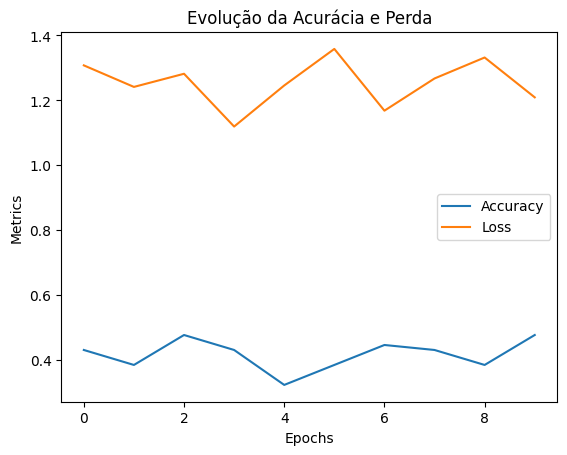

Epoch 11: acc: 41.54%, loss: 1.37
Epoch 12: acc: 43.08%, loss: 1.36
Epoch 13: acc: 44.62%, loss: 1.22
Epoch 14: acc: 46.15%, loss: 1.26
Epoch 15: acc: 41.54%, loss: 1.19
Epoch 16: acc: 43.08%, loss: 1.17
Epoch 17: acc: 46.15%, loss: 1.32
Epoch 18: acc: 41.54%, loss: 1.43
Epoch 19: acc: 46.15%, loss: 1.14
Epoch 20: acc: 40.00%, loss: 1.30


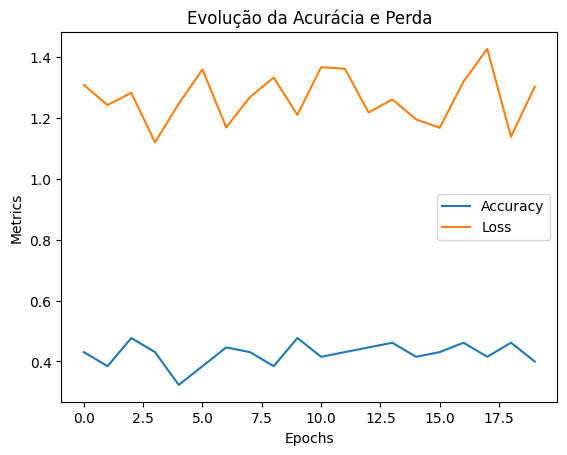

Epoch 21: acc: 43.08%, loss: 1.22
Epoch 22: acc: 46.15%, loss: 1.13
Epoch 23: acc: 46.15%, loss: 1.33
Epoch 24: acc: 47.69%, loss: 1.10
Epoch 25: acc: 49.23%, loss: 1.22
Epoch 26: acc: 43.08%, loss: 1.25
Epoch 27: acc: 44.62%, loss: 1.28
Epoch 28: acc: 43.08%, loss: 1.31
Epoch 29: acc: 40.00%, loss: 1.37
Epoch 30: acc: 53.85%, loss: 1.09


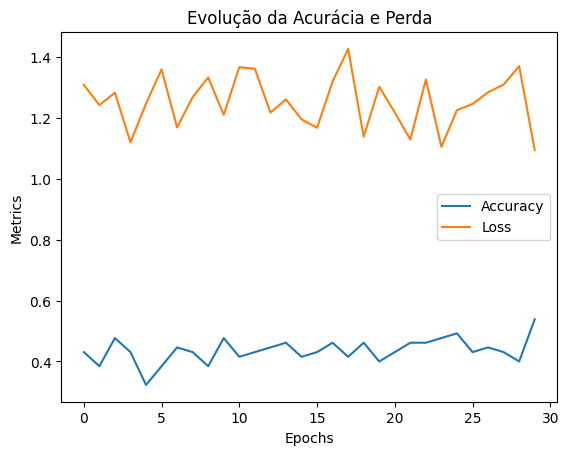

Epoch 31: acc: 41.54%, loss: 1.39
Epoch 32: acc: 35.38%, loss: 1.42
Epoch 33: acc: 46.15%, loss: 1.16
Epoch 34: acc: 46.15%, loss: 1.24
Epoch 35: acc: 47.69%, loss: 1.23
Epoch 36: acc: 38.46%, loss: 1.18
Epoch 37: acc: 44.62%, loss: 1.21
Epoch 38: acc: 43.08%, loss: 1.39
Epoch 39: acc: 41.54%, loss: 1.43
Epoch 40: acc: 44.62%, loss: 1.27


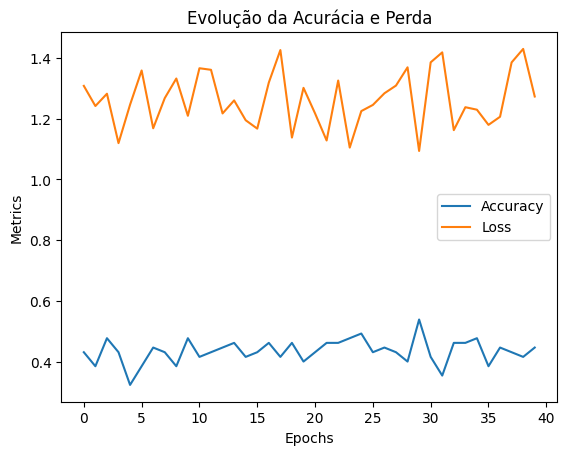

Epoch 41: acc: 44.62%, loss: 1.35
Epoch 42: acc: 47.69%, loss: 1.13
Epoch 43: acc: 43.08%, loss: 1.30
Epoch 44: acc: 38.46%, loss: 1.37
Epoch 45: acc: 38.46%, loss: 1.23
Epoch 46: acc: 29.23%, loss: 1.43
Epoch 47: acc: 49.23%, loss: 1.23
Epoch 48: acc: 33.85%, loss: 1.49
Epoch 49: acc: 46.15%, loss: 1.34
Epoch 50: acc: 41.54%, loss: 1.30


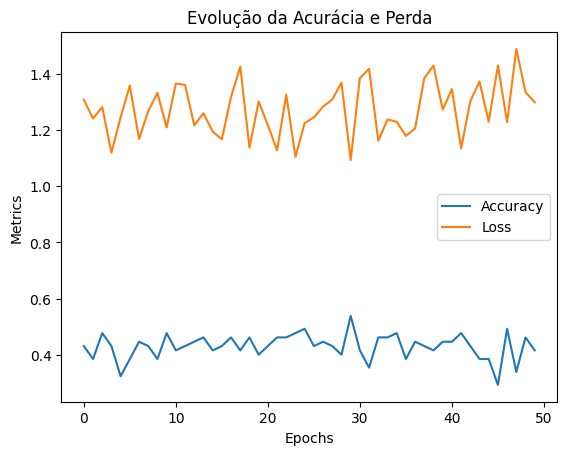

Epoch 51: acc: 43.08%, loss: 1.21
Epoch 52: acc: 47.69%, loss: 1.14
Epoch 53: acc: 47.69%, loss: 1.15
Epoch 54: acc: 46.15%, loss: 1.19
Epoch 55: acc: 33.85%, loss: 1.29
Epoch 56: acc: 49.23%, loss: 1.14
Epoch 57: acc: 43.08%, loss: 1.32
Epoch 58: acc: 46.15%, loss: 1.19
Epoch 59: acc: 47.69%, loss: 1.15
Epoch 60: acc: 44.62%, loss: 1.24


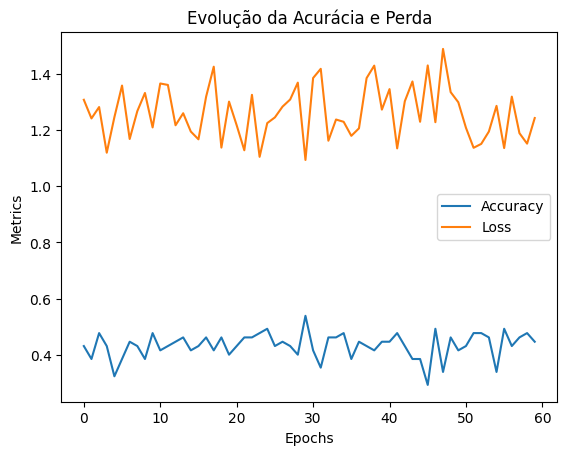

Epoch 61: acc: 35.38%, loss: 1.39
Epoch 62: acc: 55.38%, loss: 1.09


KeyboardInterrupt: 

In [128]:
# taxa de aprendizado dinamica
lr_scheduler = ReduceLROnPlateau(
    monitor='val_categorical_accuracy',
    factor=0.3,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Listas para armazenar as métricas
accuracy_list = []
loss_list = []

# Função do callback para salvar as métricas e plotar o gráfico
callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: (
        # Adiciona as métricas às listas
        accuracy_list.append(logs['accuracy']),
        loss_list.append(logs['loss']),

        # Exibe as métricas no log
        print(f"Epoch {epoch+1}: acc: {logs['accuracy']*100:.2f}%, loss: {logs['loss']:.2f}"),

        # A cada 10 épocas, desenha o gráfico
        (plt.plot(range(epoch+1), accuracy_list, label='Accuracy'),
         plt.plot(range(epoch+1), loss_list, label='Loss'),
         plt.xlabel('Epochs'),
         plt.ylabel('Metrics'),
         plt.title('Evolução da Acurácia e Perda'),
         plt.legend(),
         plt.show()) if (epoch + 1) % 10 == 0 else None
    )
)

# Treinando o modelo com o callback
model.fit(
    train_generator,
    epochs=100,
    verbose=0,
    validation_data=val_generator,
    callbacks=[callback, lr_scheduler]
)


# TESTANDO O MODELO

Obter 10 imagens aleatorias do dataset para visualizar se esta classificando corretamente

In [129]:
# Diretório do dataset
dataset_path = '/content/sistema_recomendacao_por_similaridade/Dataset'

# Lista de classes (pode ser personalizada conforme o seu dataset)
classes = ['Bermuda', 'Blusa', 'Bone', 'Relogio']

# Função para selecionar 10 imagens aleatórias
def selecionar_imagens_aleatorias(dataset_path, classes, num_imagens=20):
    imagens_selecionadas = []
    for class_name in classes:
        class_folder = os.path.join(dataset_path, class_name)
        imagens = os.listdir(class_folder)
        # Seleciona aleatoriamente as imagens
        imagens_aleatorias = random.sample(imagens, num_imagens // len(classes))  # Dividindo igualmente entre as classes
        for img_name in imagens_aleatorias:
            img_path = os.path.join(class_folder, img_name)
            imagens_selecionadas.append((img_path, class_name))  # Armazenar o caminho e a classe real
    return imagens_selecionadas

# Selecionar 10 imagens aleatórias
imagens_para_teste = selecionar_imagens_aleatorias(dataset_path, classes, num_imagens=20)


In [131]:
# Função para prever a classe de uma imagem
def prever_classe(imagem_path, model):
    img = image.load_img(imagem_path, target_size=(224, 224))  # Redimensionar para 224x224
    img_array = image.img_to_array(img)  # Converter a imagem em um array
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar dimensão extra para o batch
    img_array = preprocess_input(img_array)  # Pré-processamento específico para ResNet50

    # Fazer a previsão
    predicao = model.predict(img_array, verbose=0)
    classe_predita = np.argmax(predicao, axis=1)  # Pega a classe com maior probabilidade
    return classe_predita[0]

# Testar as 10 imagens selecionadas
resultados = []
for img_path, real_class in imagens_para_teste:
    # Prever a classe com o modelo
    classe_predita = prever_classe(img_path, model)

    # Verificar se a previsão foi correta
    correto = (classes[classe_predita] == real_class)  # Comparar com a classe real
    resultados.append((img_path, real_class, classes[classe_predita], correto))

# Mostrar os resultados
Acertos = 0
for img_path, real_class, classe_predita, correto in resultados:
    print(f"Imagem: {img_path}")
    print(f"Classe Real: {real_class} \nClasse Predita: {classe_predita} \nCorreto: {correto}")
    print("-" * 50)
    if correto:
      Acertos += 1

print(f"Acertos: {Acertos*100/len(resultados)}%")

Imagem: /content/sistema_recomendacao_por_similaridade/Dataset/Bermuda/image copy 2.png
Classe Real: Bermuda 
Classe Predita: Blusa 
Correto: False
--------------------------------------------------
Imagem: /content/sistema_recomendacao_por_similaridade/Dataset/Bermuda/image copy 15.png
Classe Real: Bermuda 
Classe Predita: Blusa 
Correto: False
--------------------------------------------------
Imagem: /content/sistema_recomendacao_por_similaridade/Dataset/Bermuda/image copy 11.png
Classe Real: Bermuda 
Classe Predita: Blusa 
Correto: False
--------------------------------------------------
Imagem: /content/sistema_recomendacao_por_similaridade/Dataset/Bermuda/image copy 18.png
Classe Real: Bermuda 
Classe Predita: Blusa 
Correto: False
--------------------------------------------------
Imagem: /content/sistema_recomendacao_por_similaridade/Dataset/Bermuda/image copy 10.png
Classe Real: Bermuda 
Classe Predita: Relogio 
Correto: False
--------------------------------------------------

# RECOMENDAÇÕES

Função para: Extrais as caracteristicas de uma imagem

In [132]:
# Função para extrair features de uma imagem
def extrair_features(imagem_path, model):
    # Carregar e pré-processar a imagem
    img = image.load_img(imagem_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Pré-processamento necessário para a ResNet50

    # Extrair as features
    features = model.predict(img_array, verbose=0)
    return features.flatten()  # Flatten para transformar em um vetor 1D


Armazenar todas as caracteristicas das imagens

In [133]:
dataset_path = '/content/sistema_recomendacao_por_similaridade/Dataset'

# Armazenar as features
features_lista = []
imagens_lista = []

# Percorrer as classes do dataset
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    # Para cada imagem da classe
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        features = extrair_features(img_path, base_model)  # Extrair features com o modelo
        features_lista.append(features)
        imagens_lista.append(img_path)

# Converter a lista de features em um array numpy
features_array = np.array(features_lista)


Função: para Calcular a Similaridade

In [134]:
from scipy.spatial.distance import cdist

# Função para encontrar as imagens mais semelhantes
def recomendar_imagens(query_image_path, features_array, imagens_lista, top_k=5):
    # Extrair features da imagem de consulta
    query_features = extrair_features(query_image_path, base_model)

    # Calcular a distância Euclidiana entre a imagem de consulta e todas as outras
    distancias = cdist([query_features], features_array, 'euclidean')

    # Encontrar os índices das imagens mais semelhantes
    indices_mais_similares = np.argsort(distancias[0])[:top_k]

    # Exibir as imagens mais semelhantes
    recomendacoes = [imagens_lista[i] for i in indices_mais_similares]
    return recomendacoes


Função para : Recomendar imagens


In [135]:
from scipy.spatial.distance import cdist

# Função para encontrar as imagens mais semelhantes com cosseno de similaridade
def recomendar_imagens_coseno(query_image_path, features_array, imagens_lista, top_k=5):
    # Extrair features da imagem de consulta
    query_features = extrair_features(query_image_path, base_model)

    # Calcular a similaridade do cosseno
    similaridades = 1 - cdist([query_features], features_array, 'cosine')  # Similaridade = 1 - distâncias
    indices_mais_similares = np.argsort(similaridades[0])[-top_k:]  # Maior similaridade primeiro

    # Exibir as imagens mais semelhantes
    recomendacoes = [imagens_lista[i] for i in indices_mais_similares]
    return recomendacoes


Mostrar recomendações

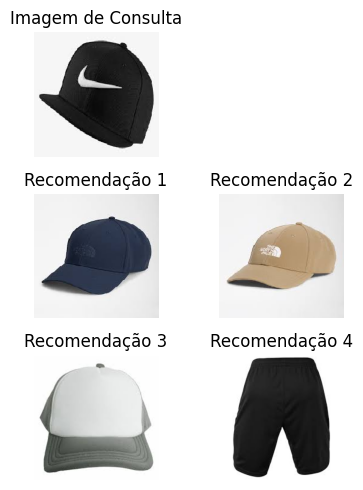

In [136]:
RandomImage = selecionar_imagens_aleatorias(dataset_path, classes)


query_image_path = random.choice(RandomImage)[0]

# Recomendação de imagens mais semelhantes
recomendacoes = recomendar_imagens(
    query_image_path,
    features_array,
    imagens_lista,
    top_k=5
)

# Carregar a imagem de consulta
query_image = load_img(query_image_path, target_size=(224, 224))

recomendacoes_filtradas = [img for img in recomendacoes if img != query_image_path]

# Criar a figura com 3 linhas e 2 colunas (a primeira linha para a imagem de consulta e a segunda para as recomendações)
plt.figure(figsize=(4, 5))  # Define o tamanho da figura

# Exibir a imagem de consulta na primeira posição (1 linha e 1 coluna)
plt.subplot(3, 2, 1)  # 3 linhas e 2 colunas, imagem na primeira posição
plt.imshow(query_image)
plt.title("Imagem de Consulta")
plt.axis('off')

# Exibir as imagens recomendadas na segunda linha (2x2 de imagens)
for i, img_path in enumerate(recomendacoes_filtradas[:4]):  # Mostrar apenas as 4 primeiras recomendações
    # Carregar cada imagem recomendada
    img = load_img(img_path, target_size=(224, 224))

    # Adicionar a imagem recomendada à figura
    plt.subplot(3, 2, i + 3)  # A posição vai variando a partir da terceira posição
    plt.imshow(img)
    plt.title(f"Recomendação {i + 1}")
    plt.axis('off')

# Exibir todas as imagens
plt.tight_layout()
plt.show()
